In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import os
import subprocess
import sys
import shutil

import codecs

In [2]:
from libraryIR import *
path_to_pool = "C:\\Users\\DavideDP\\AnacondaProjects\\Project\\terrier-core-4.2\\share\\TIPSTER\\pool\\qrels.trec7.txt"     

### We look the MAP of all the runs in input and we order them

In [ ]:
weights_dict={'n_BM25b0.75_0.res': 0.075, 'n_BB2c1.0_1.res': 0.0785, 'n_DPH_4.res': 0.0728, 'n_LemurTF_IDF_6.res': 0.0765, 'n_PL2c1.0_8.res': 0.069, 'n_DLH_3.res': 0.0743, 'n_TF_IDF_9.res': 0.0749, 'n_In_expB2c1.0_5.res': 0.0784, 'n_DFR_BM25c1.0_2.res': 0.0754, 'n_LGDc1.0_7.res': 0.0762}
import operator
sorted_w = sorted(weights_dict.items(), key=operator.itemgetter(1), reverse=True)
print sorted_w 


### We execute  all Comb algorithms on a set of systems and we progressively increased the number of systems used
We select progressively best k systems

In [36]:
path = "C:\\Users\\alvis\\Desktop\\Reperimento_dell_Informazione\\Project\\temp"     
dir_in = "input"   
dir_w = "weights"       
dir_norm = "norm"
dir_comb = "comb"

filename_list = listFiles(path, dir_norm)
np.random.seed(seed=1156818)
combList="comb_anz.txt","comb_max.txt",'comb_median.txt','comb_min.txt','comb_mnz.txt','comb_sum.txt'
results={}
        

for i in range(1,len(filename_list)+1,1):
    print i
    
    if(i<=5):
        repeat=1
    else:
        repeat=1
        
    results[i]={"comb_anz.txt":0,"comb_max.txt":0,"comb_median.txt":0,"comb_min.txt":0, "comb_mnz.txt":0,"comb_sum.txt":0}
    for j in range(0,repeat,1):
        perm=[ sorted_w[k][0] for k in range(0,i) ]
        print "Ripetizione numero: "+str(j)
        #print perm
        #Calcolo condorcet e condercet_pesato
        comb_anz(perm, path, dir_norm, dir_comb)
        comb_min(perm, path, dir_norm, dir_comb)
        comb_median(perm, path, dir_norm, dir_comb)
        comb_sum(perm, path, dir_norm, dir_comb)
        comb_mnz(perm, path, dir_norm, dir_comb)
        comb_max(perm, path, dir_norm, dir_comb)
        for filename in combList:
            MAP=take_MAP(path,dir_comb,dir_w,filename,False)#calcolo il MAP
            results[i][filename]+=MAP
    #calcolo media per i sistemi   
    for filename in combList:
        results[i][filename]=results[i][filename]/repeat
    #results[i]["condorcetWeighted.txt"]=results[i]["condorcetWeighted.txt"]/repeat

1
Ripetizione numero: 0
2
Ripetizione numero: 0
3
Ripetizione numero: 0
4
Ripetizione numero: 0
5
Ripetizione numero: 0
6
Ripetizione numero: 0
7
Ripetizione numero: 0
8
Ripetizione numero: 0
9
Ripetizione numero: 0
10
Ripetizione numero: 0


In [37]:
print results

{1: {'comb_min.txt': 0.0784807448219, 'comb_anz.txt': 0.0784807448219, 'comb_median.txt': 0.0784807448219, 'comb_max.txt': 0.0784807448219, 'comb_mnz.txt': 0.0784807448219, 'comb_sum.txt': 0.0784807448219}, 2: {'comb_min.txt': 0.0784972332603, 'comb_anz.txt': 0.0786085875419, 'comb_median.txt': 0.0786085875419, 'comb_max.txt': 0.0785818307567, 'comb_mnz.txt': 0.0785813773077, 'comb_sum.txt': 0.0785813773077}, 3: {'comb_min.txt': 0.0756778846275, 'comb_anz.txt': 0.0784731804697, 'comb_median.txt': 0.0785418629875, 'comb_max.txt': 0.0787161259961, 'comb_mnz.txt': 0.0798212321724, 'comb_sum.txt': 0.0798212321724}, 4: {'comb_min.txt': 0.0735522184272, 'comb_anz.txt': 0.079346484449, 'comb_median.txt': 0.0785316837799, 'comb_max.txt': 0.0754192966778, 'comb_mnz.txt': 0.0805933772709, 'comb_sum.txt': 0.0805956872153}, 5: {'comb_min.txt': 0.0736142491206, 'comb_anz.txt': 0.0797955375297, 'comb_median.txt': 0.0785977932696, 'comb_max.txt': 0.0765853064847, 'comb_mnz.txt': 0.0803839798818, 'com

In [43]:
results = {1: {'comb_min.txt': 0.0784807448219, 'comb_anz.txt': 0.0784807448219, 'comb_median.txt': 0.0784807448219, 'comb_max.txt': 0.0784807448219, 'comb_mnz.txt': 0.0784807448219, 'comb_sum.txt': 0.0784807448219}, 2: {'comb_min.txt': 0.0784972332603, 'comb_anz.txt': 0.0786085875419, 'comb_median.txt': 0.0786085875419, 'comb_max.txt': 0.0785818307567, 'comb_mnz.txt': 0.0785813773077, 'comb_sum.txt': 0.0785813773077}, 3: {'comb_min.txt': 0.0756778846275, 'comb_anz.txt': 0.0784731804697, 'comb_median.txt': 0.0785418629875, 'comb_max.txt': 0.0787161259961, 'comb_mnz.txt': 0.0798212321724, 'comb_sum.txt': 0.0798212321724}, 4: {'comb_min.txt': 0.0735522184272, 'comb_anz.txt': 0.079346484449, 'comb_median.txt': 0.0785316837799, 'comb_max.txt': 0.0754192966778, 'comb_mnz.txt': 0.0805933772709, 'comb_sum.txt': 0.0805956872153}, 5: {'comb_min.txt': 0.0736142491206, 'comb_anz.txt': 0.0797955375297, 'comb_median.txt': 0.0785977932696, 'comb_max.txt': 0.0765853064847, 'comb_mnz.txt': 0.0803839798818, 'comb_sum.txt': 0.0803800329797}, 6: {'comb_min.txt': 0.0735823360048, 'comb_anz.txt': 0.0794500843261, 'comb_median.txt': 0.0780011191007, 'comb_max.txt': 0.0765698744653, 'comb_mnz.txt': 0.0798122302556, 'comb_sum.txt': 0.0798042550159}, 7: {'comb_min.txt': 0.0735970877375, 'comb_anz.txt': 0.0790363546185, 'comb_median.txt': 0.076320047268, 'comb_max.txt': 0.0765258462642, 'comb_mnz.txt': 0.0791798363486, 'comb_sum.txt': 0.0791849986112}, 8: {'comb_min.txt': 0.0724478969103, 'comb_anz.txt': 0.0787274286012, 'comb_median.txt': 0.0762529560744, 'comb_max.txt': 0.0764887710783, 'comb_mnz.txt': 0.078663385211, 'comb_sum.txt': 0.0786878583878}, 9: {'comb_min.txt': 0.0719383404419, 'comb_anz.txt': 0.0786865744372, 'comb_median.txt': 0.0756985088765, 'comb_max.txt': 0.0764676031325, 'comb_mnz.txt': 0.0785780099973, 'comb_sum.txt': 0.0785927172854}, 10: {'comb_min.txt': 0.0671863866897, 'comb_anz.txt': 0.0764415443893, 'comb_median.txt': 0.0748769445362, 'comb_max.txt': 0.0727252889073, 'comb_mnz.txt': 0.0781664613426, 'comb_sum.txt': 0.0781900029676}}


In [44]:
keys=results.keys()
x=[]+keys
y={}
for cl in combList:
    y[cl]=list()

for i in range(1,len(keys)+1):
    for cl in combList:
        y[cl].append(results[i][cl])

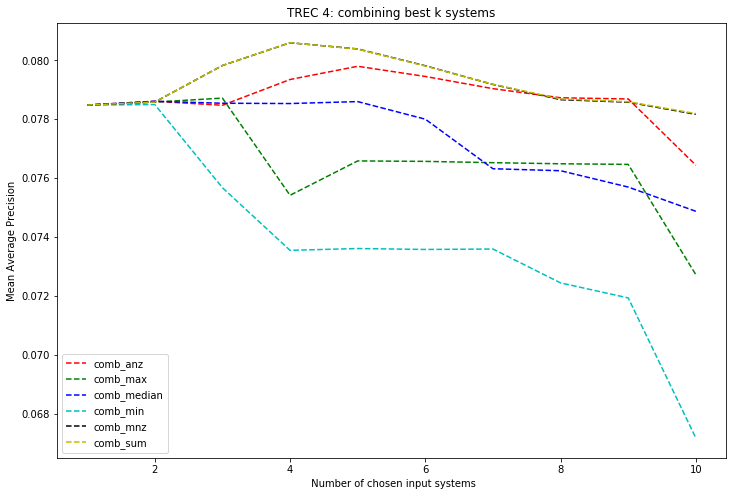

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=[12,8]
colors=["r","g", "b", "c", "k", "y"]

plt.xlabel(' Number of chosen input systems')
plt.ylabel('Mean Average Precision')
plt.title('TREC 4: combining best k systems')
for i in range(len(combList)):
    plt.plot(x,y[combList[i]],colors[i]+"--")
plt.legend( [s.replace(".txt","") for s in combList])
plt.show()